In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
#import seaborn as sns
from scipy import stats
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
1,9808700762,20140611T000000,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
2,9208900037,20140919T000000,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
3,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
4,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401819e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673618e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df[df.bedrooms>7]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
30,1346300150,20141020T000000,3300000.0,8,4.00,7710,11750,3.5,0,0,...,12,6090,1620,1904,0,98112,47.6263,-122.314,4210,8325
177,685000115,20141007T000000,2150000.0,8,6.00,4340,9415,2.0,0,0,...,8,4340,0,1967,0,98004,47.6316,-122.202,2050,9100
216,1338600225,20140528T000000,1970000.0,8,3.50,4440,6480,2.0,0,3,...,10,3140,1300,1959,0,98112,47.6310,-122.303,4440,8640
396,1652500060,20140711T000000,1650000.0,8,2.75,4040,20666,1.0,0,0,...,9,2020,2020,1962,0,98004,47.6340,-122.221,3670,20500
641,8823900290,20150317T000000,1400000.0,9,4.00,4620,5508,2.5,0,0,...,11,3870,750,1915,0,98105,47.6684,-122.309,2710,4320
829,9822700190,20140808T000000,1280000.0,9,4.50,3650,5000,2.0,0,0,...,8,2530,1120,1915,2010,98105,47.6604,-122.289,2510,5000
1110,627300145,20140814T000000,1150000.0,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
1840,8823901445,20150313T000000,934000.0,9,3.00,2820,4480,2.0,0,0,...,7,1880,940,1918,0,98105,47.6654,-122.307,2460,4400
2056,2769600590,20141016T000000,900000.0,8,4.00,4020,7500,1.0,0,0,...,8,2010,2010,1968,0,98107,47.6732,-122.363,1560,3737
2891,8813400155,20141219T000000,808000.0,8,3.75,3460,4600,2.0,0,0,...,7,2860,600,1987,0,98105,47.6617,-122.289,2170,3750


In [7]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016798,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016798,1.000000,0.308338,0.525133,0.702042,0.089654,0.256787,0.266331,0.397347,0.036392,0.667462,0.605565,0.323836,0.053981,0.126443,-0.053168,0.306919,0.021570,0.585372,0.082454
bedrooms,0.001286,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525133,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702042,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089654,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256787,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397347,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


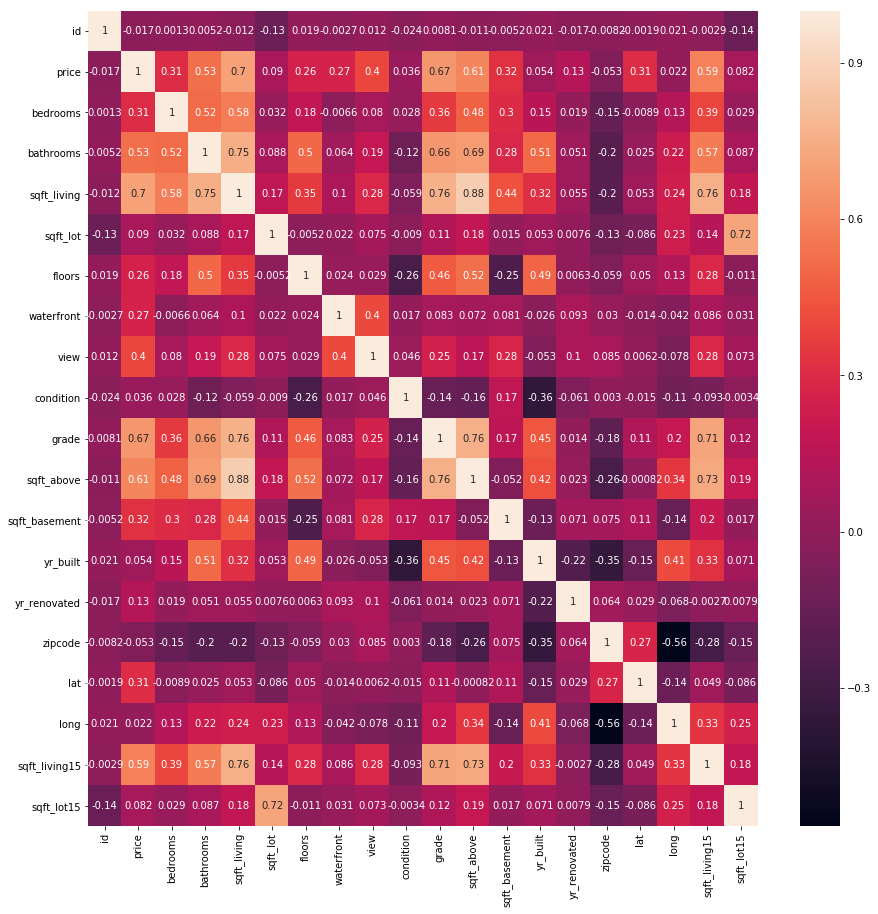

In [8]:
fig, ax=plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, ax=ax)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [10]:
df['zipcode']=df['zipcode'].astype("category")

In [11]:
#df_with_dummies = pd.get_dummies(df, prefix='Category_', columns=['zipcode'])
#df_with_dummies.head()

In [12]:
x,y =df[['bedrooms','bathrooms','sqft_living','grade',
          'floors','waterfront','view','sqft_above',
          'sqft_basement','lat','sqft_living15']], df[['price']]

In [13]:
df.shape

(21613, 21)

In [14]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401819e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673618e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [15]:
df[df.bathrooms>6]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
2,9208900037,20140919T000000,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
7,1924059029,20140617T000000,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
29,6072800246,20140702T000000,3300000.0,5,6.25,8020,21738,2.0,0,0,...,11,8020,0,2001,0,98006,47.5675,-122.189,4160,18969
64,2303900035,20140611T000000,2890000.0,5,6.25,8670,64033,2.0,0,4,...,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021
144,1225069038,20140505T000000,2280000.0,7,8.00,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800
156,2524069097,20140509T000000,2240000.0,5,6.50,7270,130017,2.0,0,0,...,12,6420,850,2010,0,98027,47.5371,-121.982,1800,44890
1053,424069279,20150328T000000,1180000.0,6,6.50,6260,10955,2.0,0,0,...,11,4840,1420,2007,0,98075,47.5947,-122.039,2710,12550
2957,9175600025,20141007T000000,800000.0,7,6.75,7480,41664,2.0,0,2,...,11,5080,2400,1953,0,98166,47.4643,-122.368,2810,33190
10817,424049043,20140811T000000,450000.0,9,7.50,4050,6504,2.0,0,0,...,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866


In [16]:
df1=df[df.bedrooms<=7]

In [44]:
df2=df1[df1.bathrooms<=6]

In [45]:
df3=df2[df2.floors<=3]

In [46]:
df3.shape

(21573, 21)

In [19]:
#df2['age']=2019-df2['yr_built']
#df2['age']

In [94]:
df3['waterfront']=df3['waterfront'].astype("category")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
df3['view']=df3['view'].astype('category')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [222]:
#df3['y_reno']=2019-df3['yr_renovated']

In [221]:
#df3['y_reno']=df3['y_reno'].astype('category')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [281]:
#df3.replace(to_replace=df3['yr_renovated']>0,value=1,inplace=True)

In [279]:
#[df3.yr_renovated>0]

In [280]:
#df3.yr_renovated.replace([df3.yr_renovated>0], [1],regex=True, inplace=True)

In [273]:
df3.shape

(21573, 23)

In [248]:
df3['renovated'] = np.where(df3['yr_renovated']>0, 1, 0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [244]:
if df3.yr_renovated>0:
    dfx.yr_renovated==1

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [249]:
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,y_reno,renovated
1,9808700762,20140611T000000,7060000.0,5,4.50,10040,37325,2.0,1,2,...,2360,1940,2001,98004,47.6500,-122.214,3930,25449,18,1
3,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,3000,2001,0,98039,47.6289,-122.233,3560,24345,2019,0
4,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,1280,2009,0,98004,47.6232,-122.220,4600,21750,2019,0
5,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,2390,1991,0,98040,47.5631,-122.210,4320,24619,2019,0
6,1247600105,20141020T000000,5110000.0,5,5.25,8010,45517,2.0,1,4,...,2020,1999,0,98033,47.6767,-122.211,3430,26788,2019,0


In [250]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21573 entries, 1 to 21612
Data columns (total 23 columns):
id               21573 non-null int64
date             21573 non-null object
price            21573 non-null float64
bedrooms         21573 non-null int64
bathrooms        21573 non-null float64
sqft_living      21573 non-null int64
sqft_lot         21573 non-null int64
floors           21573 non-null float64
waterfront       21573 non-null category
view             21573 non-null category
condition        21573 non-null int64
grade            21573 non-null int64
sqft_above       21573 non-null int64
sqft_basement    21573 non-null int64
yr_built         21573 non-null int64
yr_renovated     21573 non-null int64
zipcode          21573 non-null category
lat              21573 non-null float64
long             21573 non-null float64
sqft_living15    21573 non-null int64
sqft_lot15       21573 non-null int64
y_reno           21573 non-null category
renovated        21573 non-null 

In [251]:
x,y =df3[['bedrooms','bathrooms','sqft_living','grade',
          'floors','waterfront','view','sqft_above',
          'sqft_basement','lat','sqft_living15','renovated']], df3[['price']]

In [167]:
df.waterfront.nunique()

2

In [168]:
df.view.nunique()

5

In [252]:
x.head(2)

,bedrooms,bathrooms,sqft_living,grade,floors,waterfront,view,sqft_above,sqft_basement,lat,sqft_living15,renovated
1,5,4.50,10040,11,2.0,1,2,7680,2360,47.6500,3930,1
3,5,5.75,9200,13,2.0,0,0,6200,3000,47.6289,3560,0


In [170]:
y.head(2)

,price
1,7060000.0
3,5570000.0


In [253]:
import statsmodels.api as sm
x = sm.add_constant(x)

In [254]:
x.head(2)

,const,bedrooms,bathrooms,sqft_living,grade,floors,waterfront,view,sqft_above,sqft_basement,lat,sqft_living15,renovated
1,1.0,5,4.50,10040,11,2.0,1,2,7680,2360,47.6500,3930,1
3,1.0,5,5.75,9200,13,2.0,0,0,6200,3000,47.6289,3560,0


In [255]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

In [256]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.1,random_state=13)

In [257]:
print(x_train.shape,
x_test.shape,
y_train.shape,
y_test.shape)

(19415, 13) (2158, 13) (19415, 1) (2158, 1)


In [258]:
reg=linear_model.LinearRegression()
regmodel=reg.fit(x_train, y_train)

y_test_pre = regmodel.predict(x_test)

y_test_pre

(mean_squared_error(y_test,y_test_pre))**0.5

r2_score(y_test,y_test_pre)

0.6395501087756548

In [259]:
from sklearn.linear_model import Ridge, Lasso

ridge_reg=linear_model.Ridge()
ridge_reg.fit(x_train,y_train)
y_ridge_pre = ridge_reg.predict(x_test)

(mean_squared_error(y_test,y_ridge_pre))**0.5

r2_score(y_test,y_ridge_pre)

0.6395837472699819

In [260]:
lassoreg=linear_model.Lasso()
lassoreg.fit(x_train,y_train)
y_lasso_pre = lassoreg.predict(x_test)

(mean_squared_error(y_test,y_lasso_pre))**0.5

r2_score(y_test,y_lasso_pre)

0.6395510657755755

In [261]:
from sklearn.linear_model import ElasticNet

E = ElasticNet(l1_ratio=0.9)

E.fit(x_train,y_train)

y_E_pre = E.predict(x_test)

(mean_squared_error(y_test,y_E_pre))**0.5

r2_score(y_test,y_E_pre)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.5684820128846961

In [262]:
x1,y1 =df3[['bedrooms','bathrooms','sqft_living','grade',
          'floors','waterfront','view','sqft_above',
          'sqft_basement','lat','sqft_living15', 'zipcode','renovated']], df3[['price']]

In [263]:
x1['zipcode']=x1['zipcode'].astype("category")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [264]:
x1['renovated']=x1['renovated'].astype("category")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [265]:
x1 = pd.get_dummies(x1, drop_first=True)

In [266]:
x1.head()

,bedrooms,bathrooms,sqft_living,grade,floors,sqft_above,sqft_basement,lat,sqft_living15,waterfront_1,...,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1
1,5,4.50,10040,11,2.0,7680,2360,47.6500,3930,1,...,0,0,0,0,0,0,0,0,0,1
3,5,5.75,9200,13,2.0,6200,3000,47.6289,3560,0,...,0,0,0,0,0,0,0,0,0,0
4,5,5.00,8000,12,2.0,6720,1280,47.6232,4600,0,...,0,0,0,0,0,0,0,0,0,0
5,6,6.00,7390,12,2.0,5000,2390,47.5631,4320,1,...,0,0,0,0,0,0,0,0,0,0
6,5,5.25,8010,12,2.0,5990,2020,47.6767,3430,1,...,0,0,0,0,0,0,0,0,0,0


In [267]:
x1.grade.nunique()

12

In [268]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21573 entries, 1 to 21612
Data columns (total 84 columns):
bedrooms         21573 non-null int64
bathrooms        21573 non-null float64
sqft_living      21573 non-null int64
grade            21573 non-null int64
floors           21573 non-null float64
sqft_above       21573 non-null int64
sqft_basement    21573 non-null int64
lat              21573 non-null float64
sqft_living15    21573 non-null int64
waterfront_1     21573 non-null uint8
view_1           21573 non-null uint8
view_2           21573 non-null uint8
view_3           21573 non-null uint8
view_4           21573 non-null uint8
zipcode_98002    21573 non-null uint8
zipcode_98003    21573 non-null uint8
zipcode_98004    21573 non-null uint8
zipcode_98005    21573 non-null uint8
zipcode_98006    21573 non-null uint8
zipcode_98007    21573 non-null uint8
zipcode_98008    21573 non-null uint8
zipcode_98010    21573 non-null uint8
zipcode_98011    21573 non-null uint8
zipcode_980

In [214]:
#import statsmodels.api as sm
#x1 = sm.add_constant(x1)

In [269]:
x1_train, x1_test, y1_train, y1_test=train_test_split(x1,y1,test_size=0.1,random_state=13)

In [270]:
reg=linear_model.LinearRegression()
regmodel=reg.fit(x1_train, y1_train)

y1_test_pre = regmodel.predict(x1_test)

y1_test_pre

print((mean_squared_error(y1_test,y1_test_pre))**0.5,

r2_score(y1_test,y1_test_pre))

153301.88601482956 0.8003444352875607


In [271]:
from sklearn.linear_model import Ridge, Lasso

ridge_reg=linear_model.Ridge()
ridge_reg.fit(x1_train,y1_train)
y1_ridge_pre = ridge_reg.predict(x1_test)

print((mean_squared_error(y1_test,y1_ridge_pre))**0.5,

r2_score(y1_test,y1_ridge_pre))

153494.8665707029 0.7998414552663657


In [272]:
lassoreg=linear_model.Lasso()
lassoreg.fit(x1_train,y1_train)
y1_lasso_pre = lassoreg.predict(x1_test)

print((mean_squared_error(y1_test,y1_lasso_pre))**0.5,

r2_score(y1_test,y1_lasso_pre))

153323.78245704438 0.8002873967362123


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [162]:
from sklearn.linear_model import ElasticNet

E = ElasticNet(l1_ratio=0.9)

E.fit(x1_train,y1_train)

y1_E_pre = E.predict(x1_test)

print((mean_squared_error(y1_test,y1_E_pre))**0.5,

r2_score(y1_test,y1_E_pre))

218254.04059051376 0.595320682594498


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
